In [1]:
import pandas as pd
import numpy as np
# from retentioneering import datasets
from typing import Literal, Union, List, Optional, Iterable, get_args, Dict, Tuple
import numpy as np 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_user_events_data(num_users=1000, num_events=10, num_cities=10, num_os=2, num_rows=5000, seed=42):
    """
    Функция для генерации данных о событиях пользователей.
    """
    # Устанавливаем seed для генератора случайных чисел
    np.random.seed(seed)

    # Создаем список пользователей
    users = ['user' + str(i) for i in range(1, num_users+1)]

    # Создаем список событий
    events = ['event' + str(i) for i in range(1, num_events+1)]

    # Создаем список дат
    dates = [datetime.datetime.now() - datetime.timedelta(days=x) for x in range(180)]

    # Создаем список городов
    cities = ['city' + str(i) for i in range(1, num_cities+1)]

    # Создаем список операционных систем
    os = ['iOS', 'Android']

    # Создаем DataFrame
    df = pd.DataFrame({
        'user_id': np.random.choice(users, num_rows),
        'event': np.random.choice(events, num_rows),
        'event_datetime': np.random.choice(dates, num_rows),
        'city': np.random.choice(cities, num_rows),
        'operation_system': np.random.choice(os, num_rows)
    })

    return df

# Importing custom modules

In [3]:
import sys

sys.path.append('d:\\diplom\\product\\insight_pulse')

for path in sys.path:
    print(path)

D:\pythonProg\Python\Python312\python312.zip
D:\pythonProg\Python\Python312\DLLs
D:\pythonProg\Python\Python312\Lib
D:\pythonProg\Python\Python312
d:\diplom\.venv

d:\diplom\.venv\Lib\site-packages
d:\diplom\.venv\Lib\site-packages\win32
d:\diplom\.venv\Lib\site-packages\win32\lib
d:\diplom\.venv\Lib\site-packages\Pythonwin
d:\diplom\product\insight_pulse


In [4]:
from eventframing.eventframe import EventFrame
from eventframing.cols_schema import EventFrameColsSchema
from eventframing.event_type import EventType

from data_preprocessing.data_preprocessor import DataPreprocessor
from data_preprocessing.preprocessors_lib.add_start_end_events import AddStartEndEventsPreprocessor
from data_preprocessing.preprocessors_lib.split_sessions import SplitSessionsPreprocessor
from data_preprocessing.preprocessors_lib.add_cohorts_preprocessor import AddCohortsPreprocessor

from tooling.cohorts.cohorts import Cohorts
from metrics.metric import MetricKPI

# Testing

## Funnel test

In [28]:
data = generate_user_events_data(num_rows=500_000, num_users=10000)
cols_schema = {'user_id': 'user_id', 'event_timestamp': 'event_datetime', 'event_name': 'event'}
ef = EventFrame(data, cols_schema)
ef.to_dataframe().head()


EventFrameColsSchema(event_id=None, event_type=None, event_index=None, event_name=event, event_timestamp=event_datetime, user_id=user_id, session_id=None, cohort_group=None, custom_cols=[])


,user_id,event,event_datetime,city,operation_system,event_id,event_type,event_type_index
364036,user1,event1,2024-08-30 20:08:36.782600,city6,iOS,364036,raw,2
269736,user1,event6,2024-09-02 20:08:36.782600,city1,iOS,269736,raw,2
258496,user1,event2,2024-09-08 20:08:36.782600,city3,Android,258496,raw,2
476915,user1,event10,2024-09-10 20:08:36.782600,city6,iOS,476915,raw,2
122199,user1,event3,2024-09-14 20:08:36.782600,city3,Android,122199,raw,2


In [6]:
cohorts = Cohorts()

In [7]:
unique_users_count = lambda data, cols_schema: data[cols_schema.user_id].nunique()
unique_users_count_metric = MetricKPI(unique_users_count, 'AU', 'AU')

In [8]:
custom_ct = cohorts.fit_by_custom_kpi(ef, kpi_metric=unique_users_count_metric, kpi_metric_kwargs={'cols_schema': ef.cols_schema}, cohort_period='D', represent_by='period')

copy
EventFrameColsSchema(event_id=event_id, event_type=event_type, event_index=event_type_index, event_name=event, event_timestamp=event_datetime, user_id=user_id, session_id=None, cohort_group=cohort_group, custom_cols=[])


In [9]:
custom_ct[custom_ct.iloc[:, 0] == 0]

cohort_period,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
cohort_group,,,,,,,,,,,,,,,,,,,,,
2024-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
default_ct = cohorts.fit(ef, represent_by='period', normalize=True, cohort_period='W')
default_ct

copy
EventFrameColsSchema(event_id=event_id, event_type=event_type, event_index=event_type_index, event_name=event, event_timestamp=event_datetime, user_id=user_id, session_id=None, cohort_group=cohort_group, custom_cols=[])
    user_id    event             event_datetime   city operation_system  \
0  user7271  event10 2024-10-24 20:08:36.782600  city4          Android   
1   user861   event1 2024-11-13 20:08:36.782600  city9              iOS   
2  user5391   event2 2024-09-13 20:08:36.782600  city5          Android   
3  user5192   event6 2025-01-25 20:08:36.782600  city7              iOS   
4  user5735   event9 2025-01-03 20:08:36.782600  city1          Android   

   event_id event_type  event_type_index cohort_time_unit cohort_group  \
0         0        raw                 2       2024-10-21   2024-09-02   
1         1        raw                 2       2024-11-11   2024-08-26   
2         2        raw                 2       2024-09-09   2024-08-26   
3         3        raw      

d:\diplom\product\insight_pulse\tooling\cohorts\cohorts.py:268: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)


cohort_period,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
cohort_group,,,,,,,,,,,,,,,,,,,,,
2024-08-26,100.0,85.367316,85.682159,85.532234,85.082459,85.577211,86.056972,85.157421,85.442279,85.667166,...,85.067466,85.442279,85.637181,85.412294,86.311844,85.997001,86.311844,86.461769,86.056972,24.407796
2024-09-02,100.0,84.371737,85.276714,85.555169,86.773408,85.415942,85.729203,85.764010,85.589976,86.460146,...,86.738601,86.042464,86.077271,85.172294,85.137487,85.903237,86.077271,85.381135,24.538810,0.000000
2024-09-09,100.0,86.410256,85.641026,88.717949,82.820513,84.615385,84.102564,85.384615,88.717949,86.666667,...,86.923077,86.410256,85.897436,89.487179,83.846154,85.897436,87.692308,22.820513,0.000000,0.000000
2024-09-16,100.0,89.090909,78.181818,81.818182,83.636364,87.272727,90.909091,90.909091,72.727273,92.727273,...,87.272727,80.000000,87.272727,87.272727,85.454545,81.818182,21.818182,0.000000,0.000000,0.000000
2024-09-23,100.0,90.000000,80.000000,80.000000,90.000000,100.000000,90.000000,90.000000,90.000000,90.000000,...,80.000000,90.000000,90.000000,80.000000,80.000000,50.000000,0.000000,0.000000,0.000000,0.000000
2024-09-30,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-10-07,100.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# min_cohort = pd.to_datetime('2024-08-30')
# max_cohort = pd.to_datetime('2024-09-05')

# cohorts = default_ct.index
# cohorts = cohorts[(cohorts >= min_cohort) & (cohorts <= max_cohort)]

# default_ct.loc[cohorts]

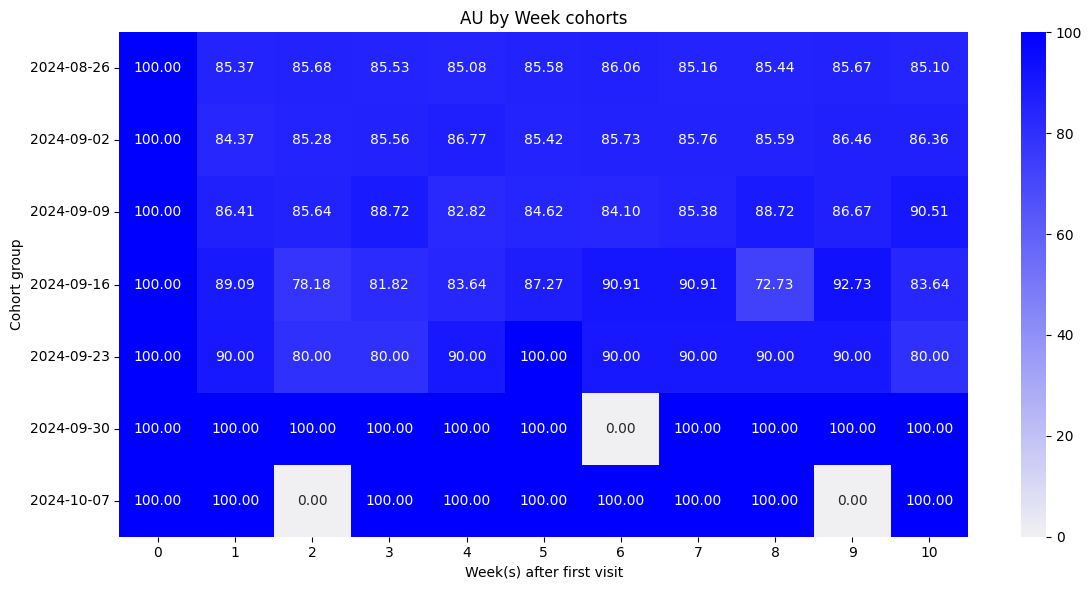

In [35]:
cohorts.plot(min_cohort='2024-08-26', max_cohort='2025-02-01', min_period=0, max_period=10)

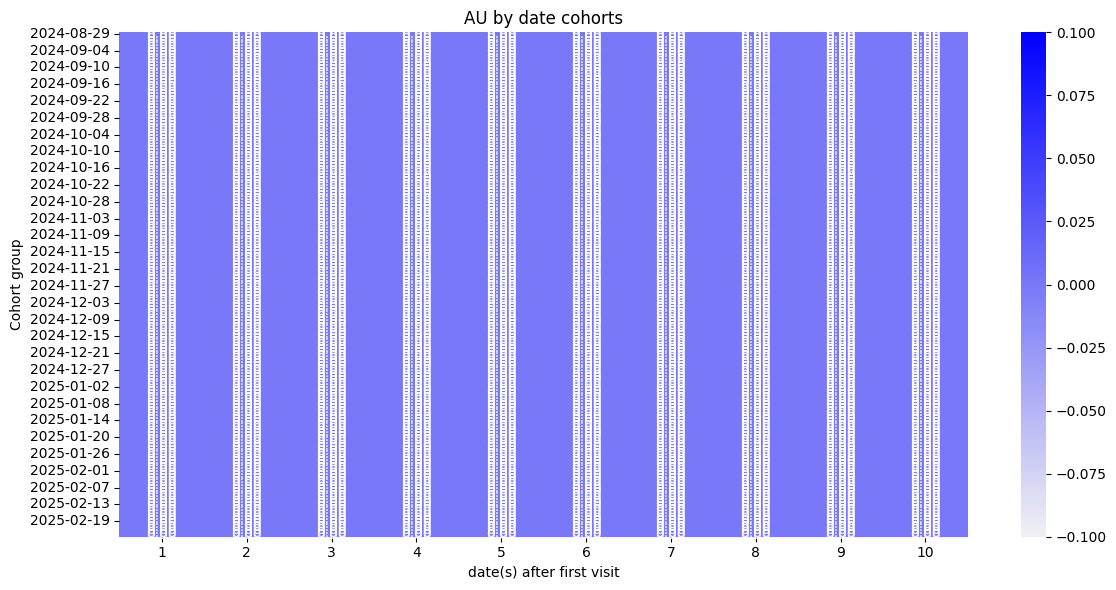

In [13]:
cohorts.plot(min_period=1, max_period=10)

In [14]:
cohorts._prepare_pivot_template(default_ct.reset_index().melt(id_vars=['cohort_group']), 'period')

,cohort_group,cohort_period
0,2024-08-29,0
1,2024-08-29,1
2,2024-08-29,2
3,2024-08-29,3
4,2024-08-29,4
...,...,...
22315,2025-02-24,119
22316,2025-02-24,120
22317,2025-02-24,121
22318,2025-02-24,122


In [15]:
cp = AddCohortsPreprocessor(cohort_period='W')
ef = cp.apply(ef)

copy
EventFrameColsSchema(event_id=event_id, event_type=event_type, event_index=event_type_index, event_name=event, event_timestamp=event_datetime, user_id=user_id, session_id=None, cohort_group=cohort_group, custom_cols=[])


In [16]:
ef.to_dataframe().head().astype(str)

,user_id,event,event_datetime,city,operation_system,event_id,event_type,event_type_index,cohort_time_unit,cohort_group,cohort_period
69,user1017,event4,2024-08-30 20:06:05.470570,city1,Android,69,raw,2,2024-08-26 00:00:00.000000,2024-08-26 00:00:00.000000,0
58,user1022,event5,2024-11-27 20:06:05.470570,city4,iOS,58,raw,2,2024-11-25 00:00:00.000000,2024-11-25 00:00:00.000000,0
113,user1029,event7,2024-11-04 20:06:05.470570,city7,Android,113,raw,2,2024-11-04 00:00:00.000000,2024-11-04 00:00:00.000000,0
282,user1046,event8,2025-01-31 20:06:05.470570,city5,iOS,282,raw,2,2025-01-27 00:00:00.000000,2025-01-27 00:00:00.000000,0
140,user1060,event5,2024-12-15 20:06:05.470570,city8,iOS,140,raw,2,2024-12-09 00:00:00.000000,2024-12-09 00:00:00.000000,0


In [17]:




def fit(self, data: EventFrame,
            kpi_metric: MetricKPI,
            kpi_metric_kwargs: Optional[Dict] = None,
            extract_cohorts: bool = True,
            cohort_period: Union[TimeUnitPeriod, str] = 'D',
            represent_by ='time_unit',
            normalize: bool = False) -> pd.DataFrame:
        pass

NameError: name 'TimeUnitPeriod' is not defined

In [ ]:
data = ef.to_dataframe().copy()
cols_schema = ef.cols_schema
represent_by = 'period'

user_id_col = cols_schema.user_id
event_timestamp_col = cols_schema.event_timestamp
cohort_col = cols_schema.cohort_group
represent_by_col = 'cohort_time_unit' if represent_by == 'time_unit' else 'cohort_period'

data.pivot_table(index=cohort_col, columns=represent_by_col, values=user_id_col, aggfunc='nunique')

cohort_period,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
cohort_group,,,,,,,,,,,,,,,,,,,,,
2024-08-26,8125.0,6912.0,6920.0,6931.0,6874.0,6991.0,6982.0,6951.0,6949.0,6931.0,...,6974.0,6926.0,6951.0,6918.0,7024.0,6958.0,6962.0,7004.0,6999.0,6625.0
2024-09-02,1620.0,1397.0,1376.0,1363.0,1415.0,1388.0,1409.0,1393.0,1396.0,1405.0,...,1373.0,1408.0,1414.0,1348.0,1384.0,1374.0,1381.0,1388.0,1291.0,NaN
2024-09-09,219.0,201.0,189.0,194.0,191.0,172.0,179.0,187.0,191.0,185.0,...,187.0,190.0,195.0,186.0,186.0,191.0,195.0,174.0,NaN,NaN
2024-09-16,29.0,25.0,23.0,25.0,20.0,24.0,25.0,26.0,22.0,26.0,...,23.0,26.0,25.0,25.0,27.0,26.0,22.0,NaN,NaN,NaN
2024-09-23,5.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,...,5.0,3.0,5.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN
2024-09-30,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2024-10-07,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
